In [2]:
## import necessary libraries
import numpy as np
import pandas as pd

## read the raw data file
df = pd.read_csv('../raw_data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

# drop duplicates
df.drop_duplicates(inplace=True)

# convert data types
df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']] = df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']].astype(int)
df.info()

#slice the dataframe for feature and label
df_copy = df.copy(deep=True)
X, y = df_copy.iloc[:,1:], df_copy.iloc[:,0]
print(X.shape)
print(y.shape)

#get dummies
def get_dummies(X):

    # Identify discrete columns with more than 2 categories
    discrete_columns = [col for col in X.columns if X[col].nunique() > 2 and X[col].dtype != 'float64']

    # Create dummy variables for these columns
    df_with_dummies = pd.get_dummies(X, columns=discrete_columns, drop_first=True)

    return df_with_dummies
X = get_dummies(X)
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  int64  
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  int64  
 15  

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,0,0,0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
# Moving forward with l2 logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [4]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

array([[<AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>],
       [<AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'MentHlth'}>],
       [<AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'GenHlth_2'}>,
        <AxesSubplot:title={'center':'GenHlth_3'}>,
        <Axe

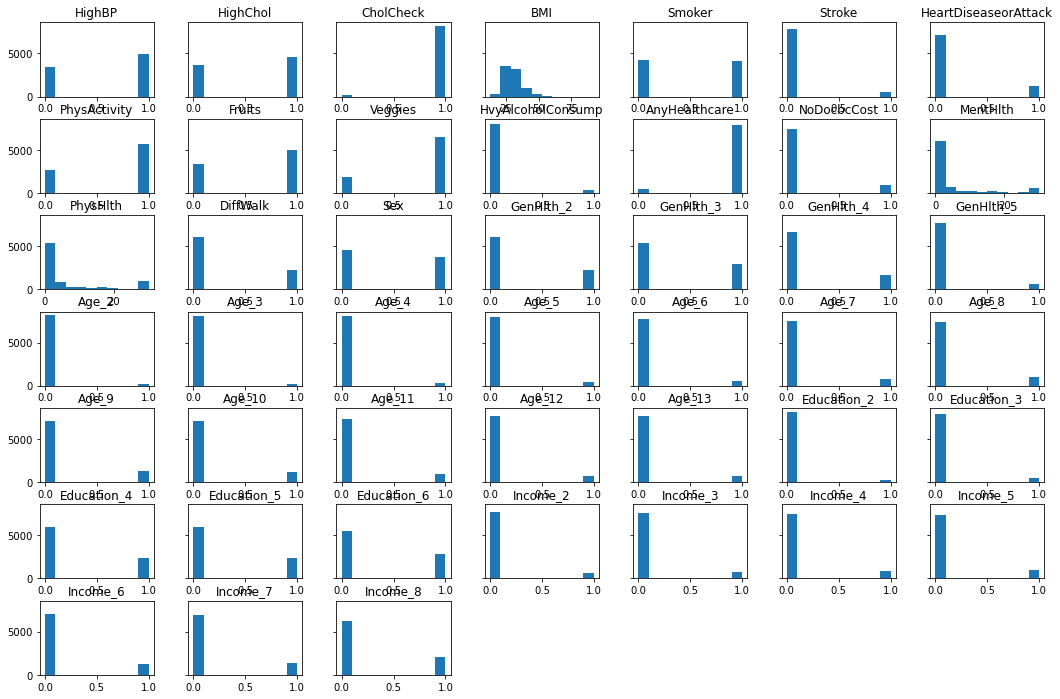

In [5]:
X_under.hist(figsize=(18,12), grid=False, sharey=True)

In [4]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_under)
X_scaled_test = scalar.fit_transform(X_test)

In [5]:
## This is the baseline dummy classifier which classifies all as the majority class

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_scaled, y_under)
y_dummy_prediction = dummy_majority.predict(X_scaled_test)

## calculate metrics
accuracy = accuracy_score(y_test, y_dummy_prediction)
precision = precision_score(y_test, y_dummy_prediction, average='macro')
recall = recall_score(y_test, y_dummy_prediction, average='macro')
f1 = f1_score(y_test, y_dummy_prediction, average='macro')
print('Unique predicted labels: ', (np.unique(y_dummy_prediction)))
print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

Unique predicted labels:  [0]
accuracy : 0.8271082436652052  precision : 0.2757027478884017 
 recall : 0.3333333333333333  f1 : 0.30179136769186493


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# Moving forward with l2 logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Training the logistic regression model
clf = LogisticRegression(penalty='l2')

clf.fit(X_scaled, y_under)

# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.5090357185599426  precision : 0.429318006774827 
 recall : 0.4978906117676091  f1 : 0.36841599634933125


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Setting up the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_scaled, y_under)

# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.5175764037731333  precision : 0.4053258745526834 
 recall : 0.4354045568930361  f1 : 0.35084249539749485


In [8]:
## we can see that both logistic regression and KNN perform very poorly, lets try more models

## Decision trees
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_scaled, y_under)

# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.43865394449098605  precision : 0.3864062926071956 
 recall : 0.4094640776950818  f1 : 0.31298777511537634


In [23]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

# Setting up the KNN classifier
svc = LinearSVC()

svc.fit(X_scaled, y_under)

# Making predictions
y_pred = svc.predict(X_scaled_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.532470923590787  precision : 0.42729655546454065 
 recall : 0.4989876748350081  f1 : 0.3761669716838895


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
## implement the naive bayes algorithm

from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_scaled, y_under)

# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.5263890853306932  precision : 0.4076303046060725 
 recall : 0.46896140714011936  f1 : 0.35625407343824445


In [11]:
## random forest prediction

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf_clf.fit(X_scaled, y_under)

# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.5582017777681068  precision : 0.4342272978615302 
 recall : 0.49403195210104656  f1 : 0.39132401376994136


In [12]:
## gradient boosing decision trees (GBDT)
from sklearn.ensemble import GradientBoostingClassifier

GBDT_clf = GradientBoostingClassifier(n_estimators=300)
GBDT_clf.fit(X_scaled, y_under)

# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.5868049133419647  precision : 0.4406871244418391 
 recall : 0.49868465932339134  f1 : 0.4052578489849205


In [13]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=300)
ada_clf.fit(X_scaled, y_under)

# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6058228977402543  precision : 0.4399643361521 
 recall : 0.506662293918808  f1 : 0.4132176313948254


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # First hidden layer
        self.fc1 = nn.Linear(45, 64)
        # Second hidden layer
        self.fc2 = nn.Linear(64, 32)
        # Third hidden layer
        self.fc3 = nn.Linear(32, 16)
        # Output layer
        self.fc4 = nn.Linear(16, 3)

    def forward(self, x):
        # Apply ReLU activation function after each hidden layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # Apply softmax to the output layer
        x = F.softmax(self.fc4(x), dim=1)
        return x

In [14]:
## implement the naive bayes algorithm

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

param_grid = [50, 150, 200, 300]

for value in param_grid:
    clf = AdaBoostClassifier(n_estimators=value)
    clf.fit(X_scaled, y_under)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

current parameter is n_estimator = 50
accuracy : 0.589154961757314  precision : 0.43941241736730136 
 recall : 0.5058533171307161  f1 : 0.40744159844860156
current parameter is n_estimator = 150
accuracy : 0.6014056771076997  precision : 0.44026838090454407 
 recall : 0.5079061806757915  f1 : 0.4121682667713809
current parameter is n_estimator = 200
accuracy : 0.598979469715927  precision : 0.43993402149359095 
 recall : 0.5063130337939039  f1 : 0.41091787664363383
current parameter is n_estimator = 300
accuracy : 0.6058228977402543  precision : 0.4399643361521 
 recall : 0.506662293918808  f1 : 0.4132176313948254


In [15]:
param_grid = [50, 150, 200, 300]

for value in param_grid:
    clf = GradientBoostingClassifier(n_estimators=value)
    clf.fit(X_scaled, y_under)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

current parameter is n_estimator = 50
accuracy : 0.5778181541240086  precision : 0.4406875625052848 
 recall : 0.5038105621177132  f1 : 0.404088826322919
current parameter is n_estimator = 150
accuracy : 0.5903626255263129  precision : 0.4422769488280905 
 recall : 0.508352900392385  f1 : 0.4093077197772912
current parameter is n_estimator = 200
accuracy : 0.5917117273943838  precision : 0.4415091071413515 
 recall : 0.5017783780410453  f1 : 0.40844903114797043
current parameter is n_estimator = 300
accuracy : 0.5870769096863339  precision : 0.44058323893440327 
 recall : 0.4984417021712344  f1 : 0.4052964093869187


In [16]:
param_grid = ['l2', 'none']

for value in param_grid:
    clf = LogisticRegression(penalty=value, max_iter=1000, solver='newton-cg')
    clf.fit(X_scaled, y_under)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

current parameter is n_estimator = l2
accuracy : 0.5091336372439155  precision : 0.42929884971018223 
 recall : 0.4978719979709112  f1 : 0.3684454763237464
current parameter is n_estimator = none
accuracy : 0.5051189712010271  precision : 0.42285237625396405 
 recall : 0.4837219714202147  f1 : 0.3608097341432997


In [26]:
clf = GradientBoostingClassifier(n_estimators=150)
clf.fit(X_scaled, y_under)
y_pred = clf.predict(X_scaled_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[45240 15884 14898]
 [  453   612   787]
 [ 2063  3568  8408]]


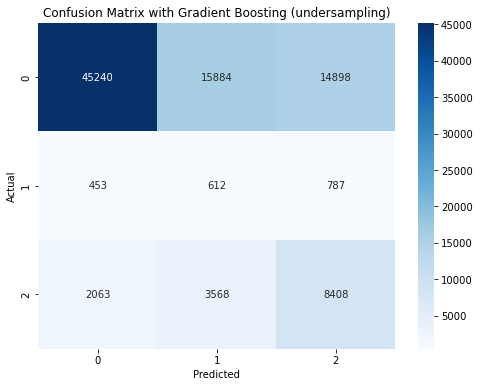

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
y_pred = clf.predict(X_scaled_test)  # Ensure you are using the test set for predictions
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for a nicer display
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Gradient Boosting (undersampling)')
plt.show()

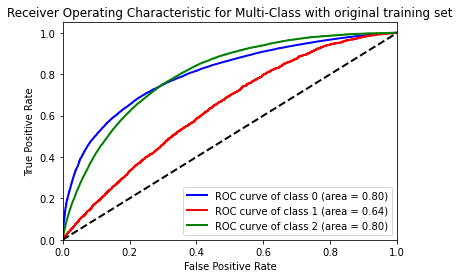

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class with original training set')
plt.legend(loc="lower right")
plt.show()